In [1]:
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      samplewise_std_normalization = True,
      samplewise_center = True,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
      samplewise_std_normalization = True,
      samplewise_center = True)


parent_dir = r'\ECSE484_Fall2020'
validation_dir = os.path.join(parent_dir, 'validation_for_CNN_2')
train_dir =   os.path.join(parent_dir, 'training_for_CNN_2')
 

train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(101,101),  # all images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,  # this is the target directory
        target_size=(101,101),  # all images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', input_shape=(101,101, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(), #fully connected
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')     
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#the other way to construct model
#model = Sequential()
#add model layers
#model.add(Conv2D(256,(8,8), activation = 'relu',input_shape = (101,101,3)))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Flatten())
#model.add(Dense(256))# a fully connected layer
#model.add(Activation('softmax'))
#model.add(Dense(2, activation='softmax'))
#model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=700,  #steps_per_epoch*batch_size =   700*  20 = 14000
    epochs = 30, 
    validation_data = validation_generator,
    validation_steps = 150, #validation_steps*batch_size =   150 *20 =  3000
    verbose=1)

Found 14000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
700/700 [==============================] - 675s 965ms/step - loss: 0.4570 - acc: 0.8069 - val_loss: 0.4398 - val_acc: 0.8040
Epoch 2/30
700/700 [==============================] - 672s 960ms/step - loss: 0.4064 - acc: 0.8274 - val_loss: 0.4687 - val_acc: 0.7720
Epoch 3/30
700/700 [==============================] - 679s 971ms/step - loss: 0.3810 - acc: 0.8400 - val_loss: 0.4439 - val_acc: 0.7970
Epoch 4/30
700/700 [==============================] - 675s 964ms/step - loss: 0.3779 - acc: 0.8424 - val_loss: 0.3835 - val_acc: 0.8437
Epoch 5/30
700/700 [==============================] - 674s 963ms/step - loss: 0.3621 - acc: 0.8506 - val_loss: 0.3649 - val_acc: 0.8483


In [2]:
model_path = r'\ECSE484_Fall2020\mymodel_4conv_2FC_dataset2'
model.save(model_path)

In [13]:
new_model = tf.keras.models.load_model(r'\ECSE484_Fall2020\mymodel_4conv_2FC_dataset2')

In [14]:
type(new_model)

tensorflow.python.keras.engine.sequential.Sequential

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       295168    
__________

In [15]:
parent_dir = r'\ECSE484_Fall2020'
test_dir =   os.path.join(parent_dir, 'testing_for_CNN_2')
test_datagen = ImageDataGenerator(rescale=1./255,
      samplewise_std_normalization = True,
      samplewise_center = True)
test_generator = test_datagen.flow_from_directory(
        test_dir,  # this is the target directory
        target_size=(101,101),  # all images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
predict_results = new_model.evaluate(test_generator)

Found 3000 images belonging to 2 classes.
150/150 [==============================] - 32s 214ms/step - loss: 0.2806 - acc: 0.8753


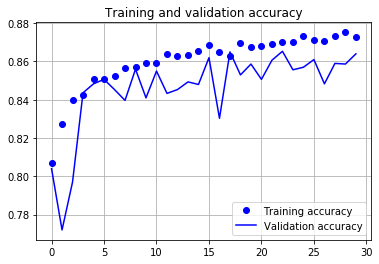

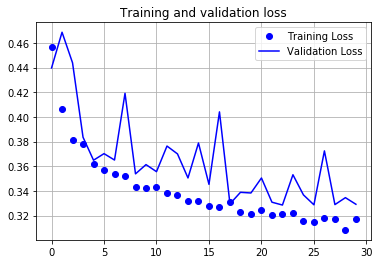

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()
plt.savefig( os.path.join(parent_dir, 'prediction_4conv_dataset2_acc.png'))
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.savefig( os.path.join(parent_dir, 'prediction_4conv_dataset2_loss.png'))
plt.show()